### Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing dataset

df= pd.read_excel('cep1_dataset.xlsx')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 1.	Preliminary analysis:
### a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
### b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(302, 14)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

One duplicate value found in the dataset and has been removed.

No null values found in the dataset

### Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


### Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
df['sex']

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 302, dtype: int64

Male= 1, Female= 0

<AxesSubplot:xlabel='sex', ylabel='count'>

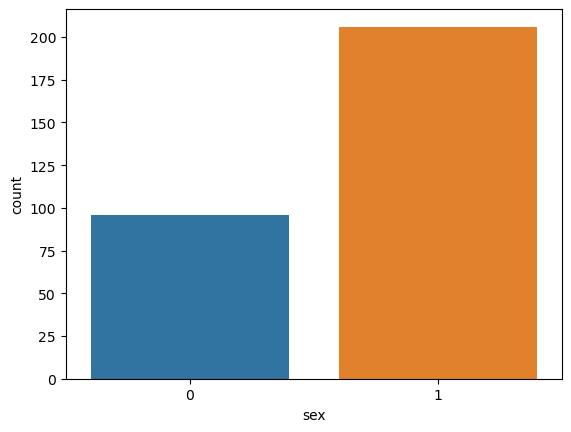

In [13]:
sns.countplot(x='sex',data=df)

Count of Male is more than the Female

In [14]:
#Exploring chest pain type
df['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

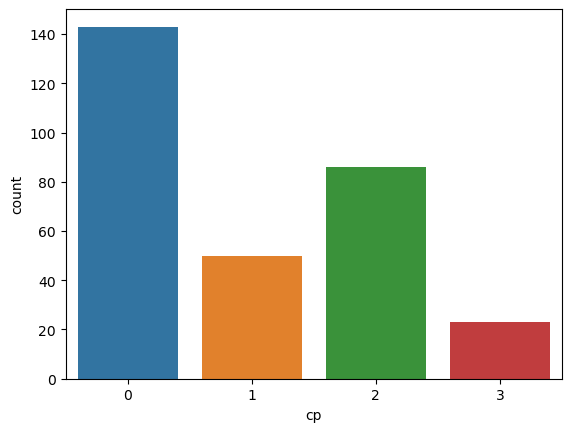

In [15]:
sns.countplot(x='cp', data=df)

In [16]:
#Fasting blood sugar > 120 mg/dl 
df['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

Here 0 indicates False and 1 indicates True.

<AxesSubplot:xlabel='fbs', ylabel='count'>

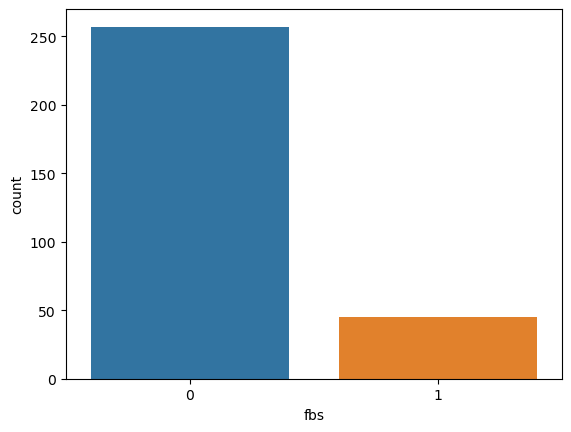

In [17]:
sns.countplot(x='fbs',data=df)

In [18]:
#Exercise induced angina 
df['exang'].value_counts()

0    203
1     99
Name: exang, dtype: int64

Here 0 indicates No and 1 indicates Yes

<AxesSubplot:xlabel='exang', ylabel='count'>

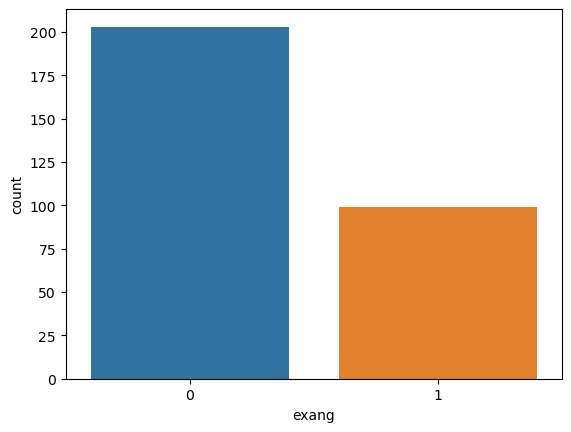

In [19]:
sns.countplot(x='exang',data=df)

### Study the occurrence of CVD across the Age category

In [20]:
# Creating variable 'cvd' to show patients suffering from CVD(target=1)
cvd= df.loc[df['target']==1]

In [21]:
# Creating a new variable named 'ncvd' for patiens who are not suffering from CVD(target=0)
ncvd=df.loc[df['target']==0]

In [22]:
df.groupby(['age','target']).size()

age  target
29   1         1
34   1         2
35   0         2
     1         2
37   1         2
              ..
70   1         1
71   1         3
74   1         1
76   1         1
77   0         1
Length: 75, dtype: int64

<AxesSubplot:xlabel='count', ylabel='age'>

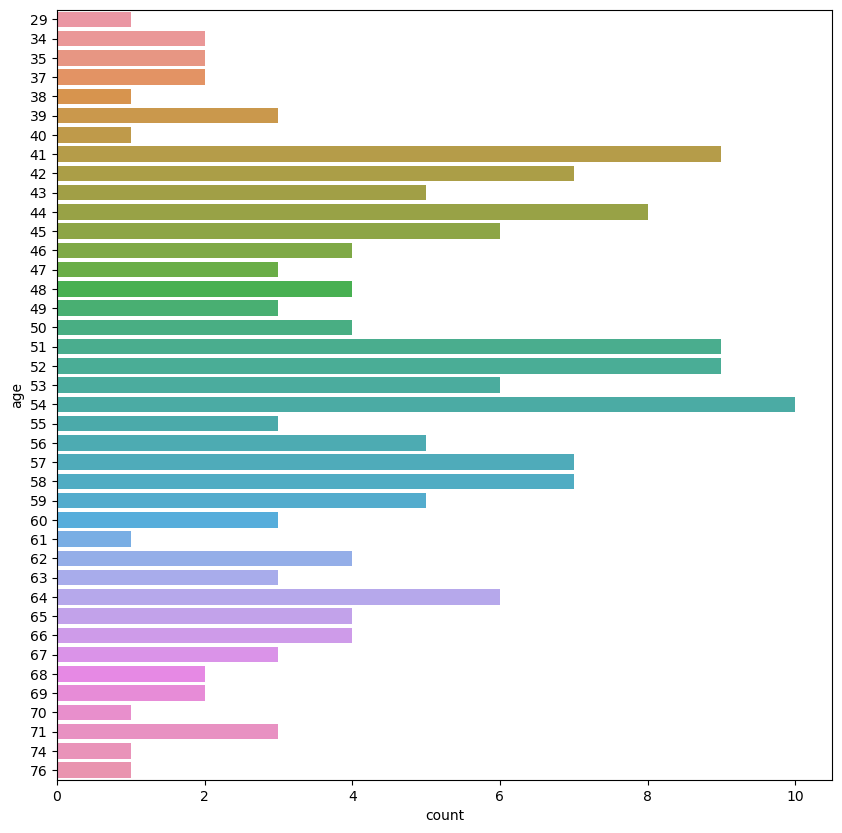

In [23]:
#plotting for age column when target = 1
plt.figure(figsize=(10,10))
sns.countplot(y=cvd['age'])

We can visualise and understand the counts of patients of different ages who are actually suffering from CVD.
Counts of patients actually suffering from cvd is more in between 41-66 years and the highest count of 10 patients observed at the age of 54 years.

### Study the composition of all patients with respect to the Sex category

In [24]:
#Lets see how many of them actually suffering from the disease

df.groupby(['sex','target']).size()

sex  target
0    0          24
     1          72
1    0         114
     1          92
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

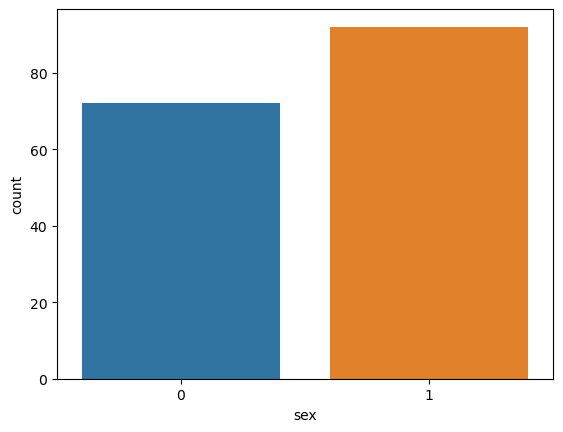

In [25]:
#plotting for sex column when target=1
sns.countplot(x=cvd['sex'])

It is observed that a total of 72 Female and 92 Male actually suffering from CVD

### Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [26]:
df.groupby(['trestbps','target']).size()

trestbps  target
94        1         2
100       0         2
          1         2
101       1         1
102       1         2
                   ..
178       1         1
180       0         2
          1         1
192       0         1
200       0         1
Length: 77, dtype: int64

<AxesSubplot:xlabel='count', ylabel='trestbps'>

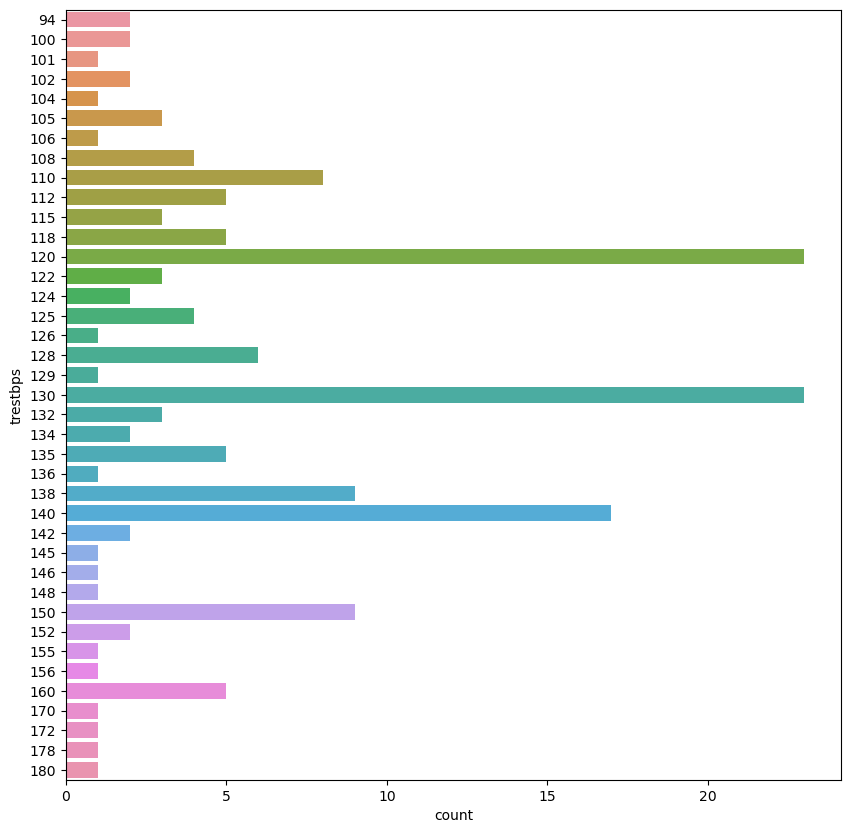

In [27]:
#plotting for trestbps when target=1
plt.figure(figsize=(10,10))
sns.countplot(y=cvd['trestbps'])

<AxesSubplot:xlabel='count', ylabel='trestbps'>

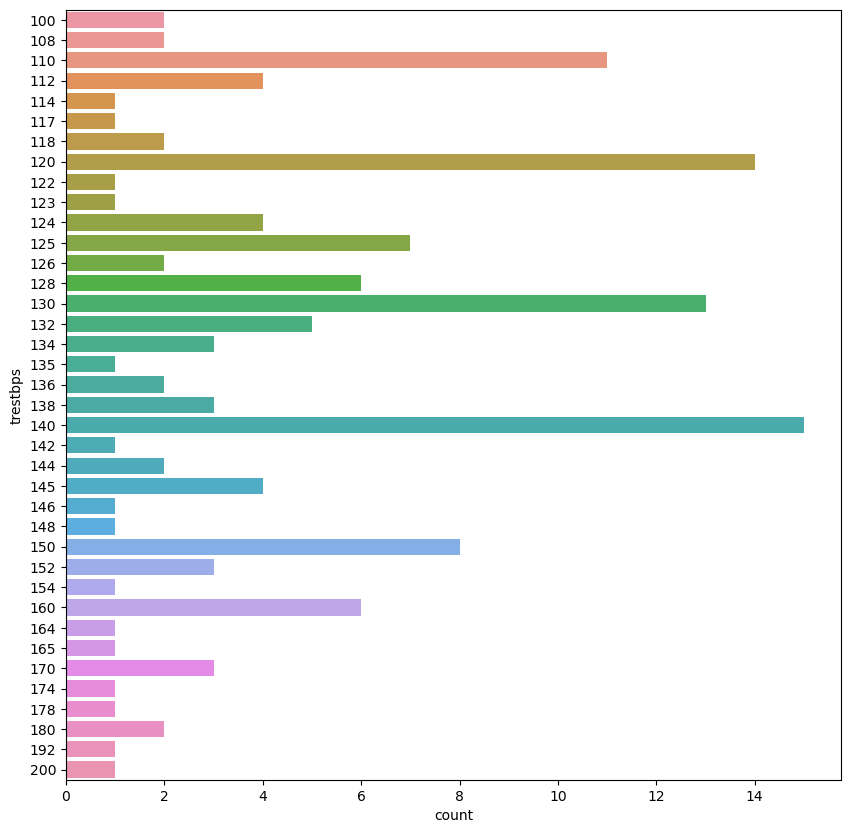

In [28]:
# Plotting 'trestbsp' for patients not suffering from CVD
plt.figure(figsize=(10,10))
sns.countplot(y=ncvd['trestbps'])

Observing both the plots i.e trestbsp of CVD patients and trestbsp of non CVD patients, it is clear that it will be really tough to predict CVD patients based on their resting blood pressure because at the trestbsp value of 120, highest number of patient suffering from CVD observed(around 23) but on the other hand, at same trestbsp value of 120, around 13 patients observed who are not suffering from CVD.

### Describe the relationship between cholesterol levels and a target variable

In [29]:
df.groupby(['chol','target']).size()

chol  target
126   1         1
131   0         1
141   1         1
149   0         1
      1         1
               ..
394   1         1
407   0         1
409   0         1
417   1         1
564   1         1
Length: 201, dtype: int64

<AxesSubplot:xlabel='count', ylabel='chol'>

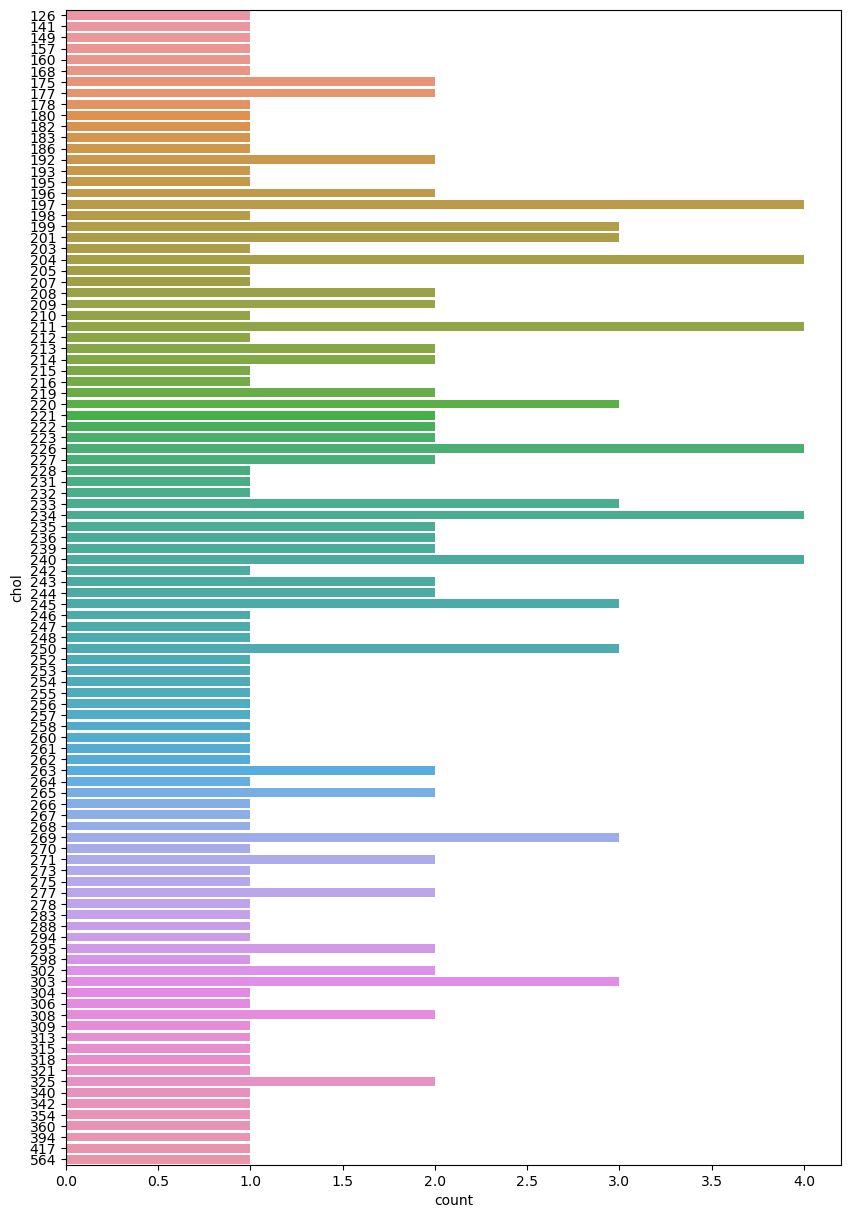

In [30]:
#plotting for cholesterol levels when target=1
plt.figure(figsize=(10,15))
sns.countplot(y=cvd['chol'])

As we can see, there are with the increase in cholesterol levels, patients are more likely to have CVD.

### State what relationship exists between peak exercising and the occurrence of a heart attack

In [31]:
#checking Exercise induced angina (1 = yes; 0 = no) with target column
df.groupby(['exang','target']).size()

exang  target
0      0          62
       1         141
1      0          76
       1          23
dtype: int64

<AxesSubplot:xlabel='exang', ylabel='count'>

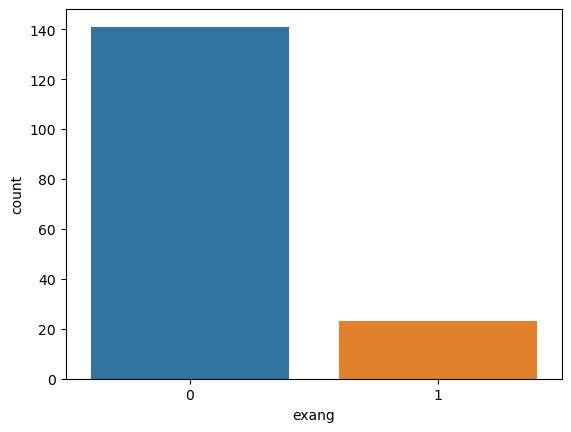

In [32]:
#plotting for Exercise induced angina (1 = yes; 0 = no) when target=1
sns.countplot(x=cvd['exang'])

We can clearly see from the above plot, when Exercise induced angina = 0, more patients are suffering from CVD

<AxesSubplot:xlabel='exang', ylabel='count'>

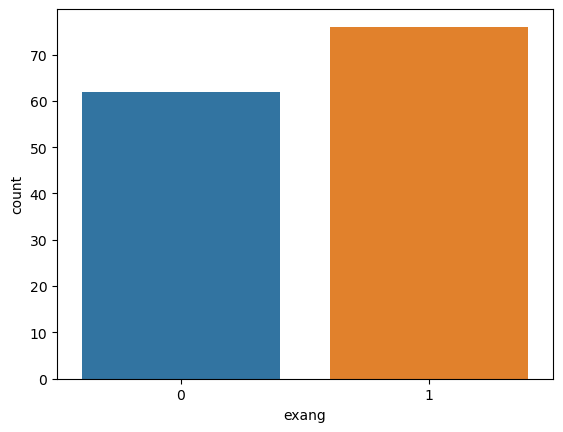

In [33]:
#plotting for Exercise induced angina (1 = yes; 0 = no) when target=0
sns.countplot(x=ncvd['exang'])

Even here, we can see that more people are not suffering from CVD when Exercise induced angina= 0

In [34]:
# checking Slope of the peak exercise ST segment with target column
df.groupby(['slope','target']).size()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      0          35
       1         106
dtype: int64

<AxesSubplot:xlabel='slope', ylabel='count'>

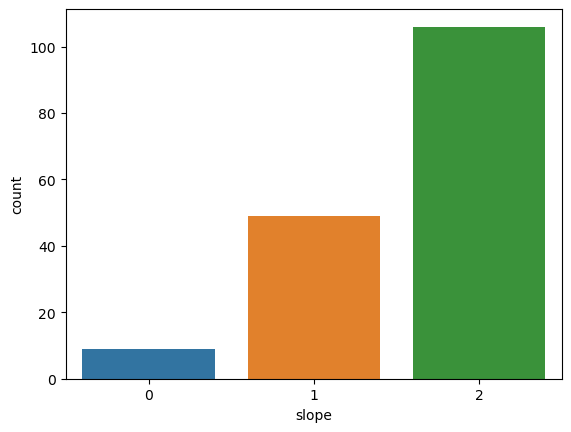

In [35]:
#plotting for Slope of the peak exercise ST segment when target=1
sns.countplot(x=cvd['slope'])

Highest number of people are suffering from CVD when  Slope of the peak exercise ST segment is at 2

### Check if thalassemia is a major cause of CVD

In [36]:
df.groupby(['thal','target']).size()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     0          36
      1         129
3     0          89
      1          28
dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

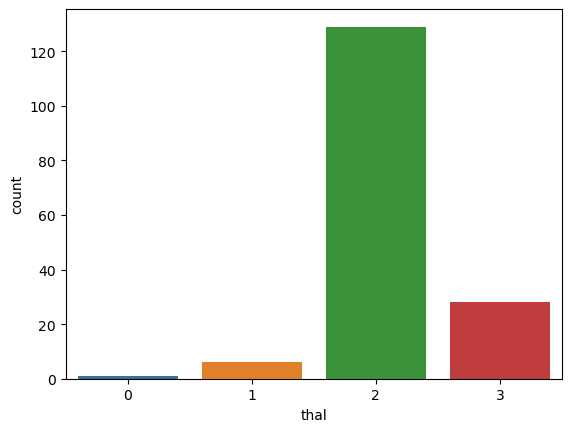

In [37]:
#plottig for thalassemia with target =1
sns.countplot(x=cvd['thal'])

At thal=2, highest patients seffering from CVD is observed

### List how the other factors determine the occurrence of CVD

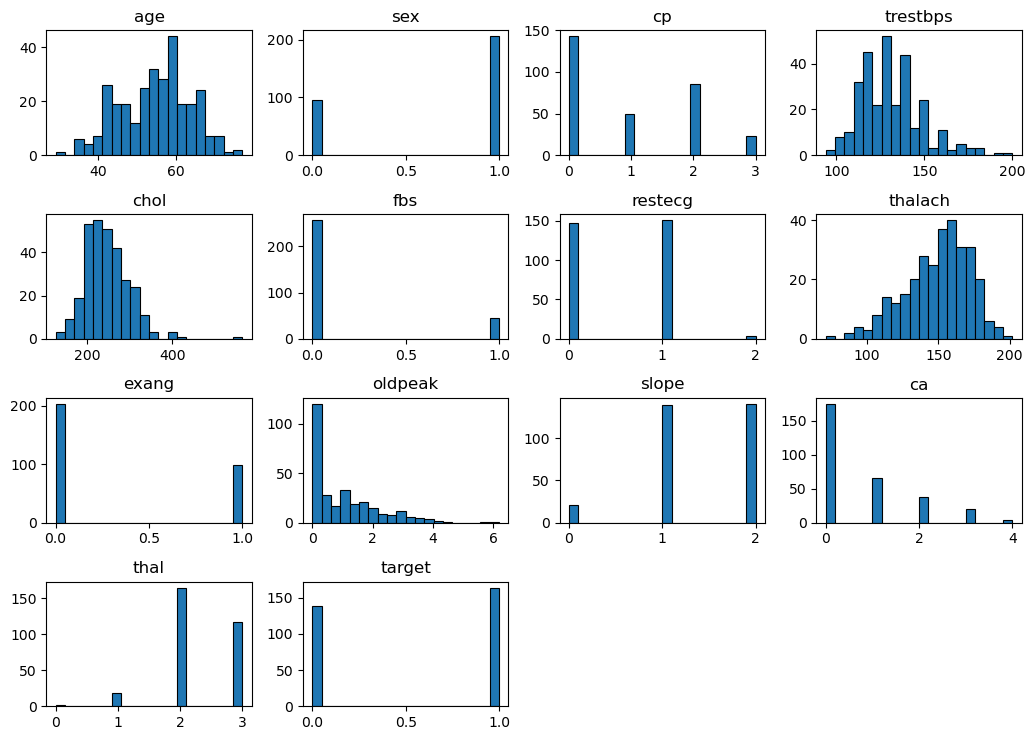

In [38]:
df.hist(bins=20, color='tab:blue', edgecolor='black', linewidth=.8, figsize=(7,5), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

In [39]:
# lets check for Fasting blood sugar > 120 mg/dl
df.groupby(['fbs','target']).size()

fbs  target
0    0         116
     1         141
1    0          22
     1          23
dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='count'>

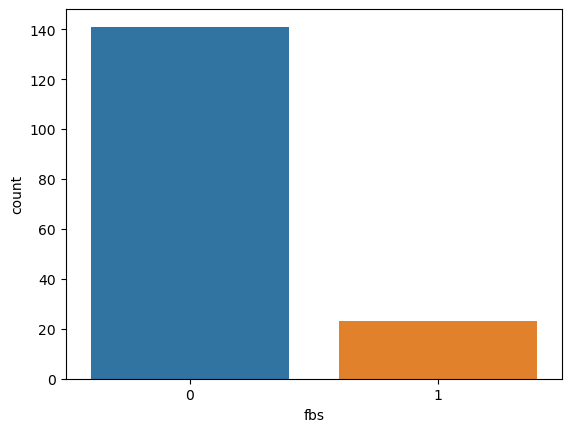

In [40]:
#plotting for Fasting blood sugar > 120 mg/dl when target =1
sns.countplot(x=cvd['fbs'])

Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

As we can see here, False value of fbs results in more cases of CVD

In [41]:
#Lets check for Maximum heart rate achieved
df.groupby(['thalach','target']).size()

thalach  target
71       0         1
88       0         1
90       0         1
95       0         1
96       0         1
                  ..
190      1         1
192      1         1
194      1         1
195      0         1
202      1         1
Length: 138, dtype: int64

<AxesSubplot:xlabel='count', ylabel='thalach'>

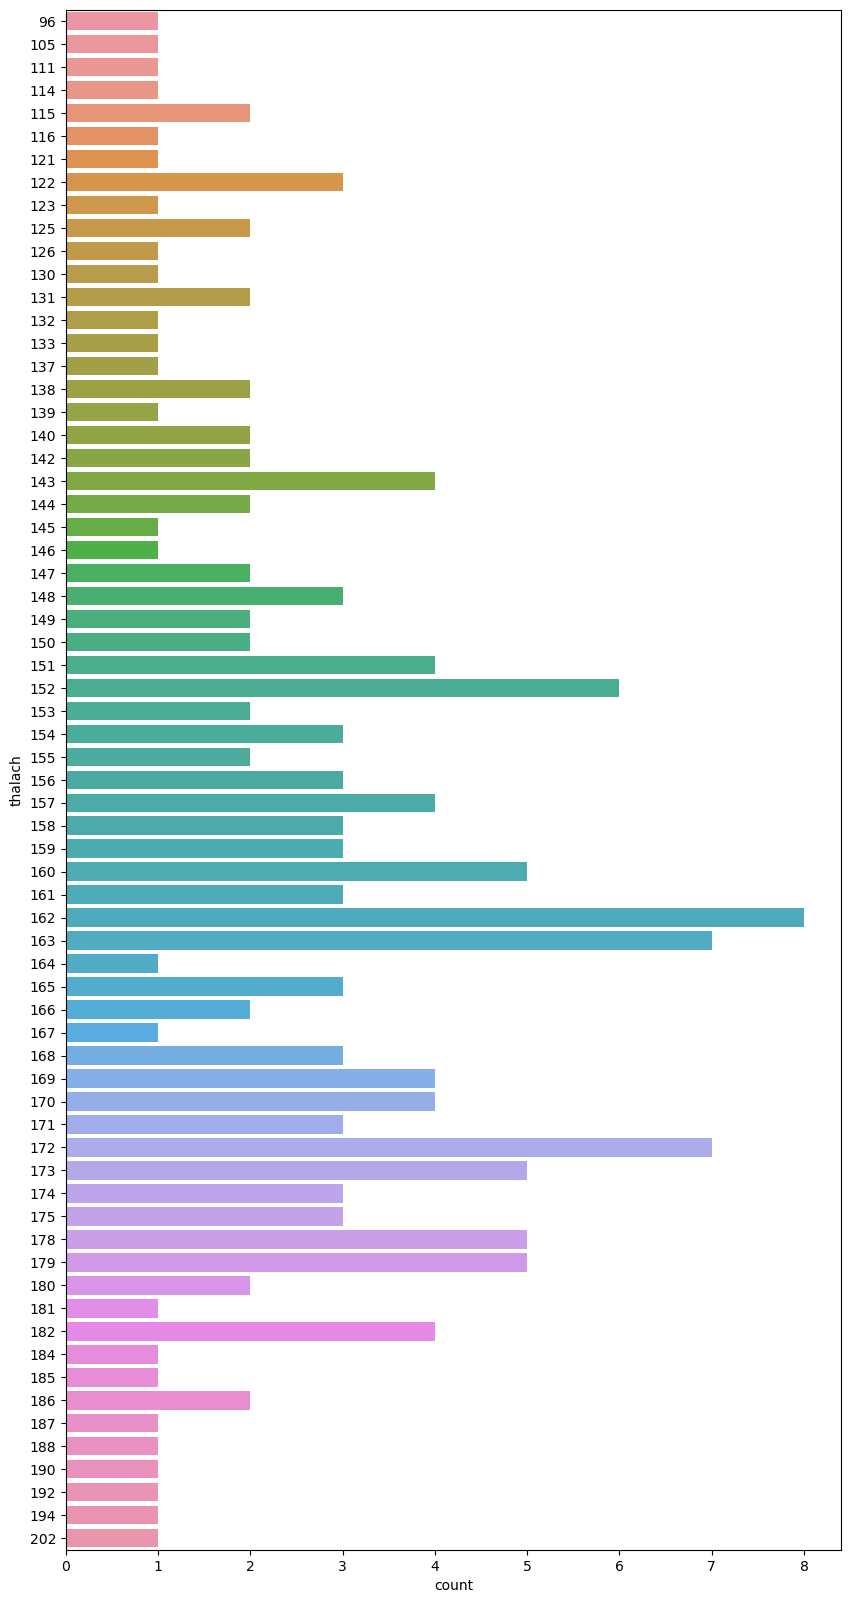

In [42]:
#plotting for Maximum heart rate achieved when target =1
plt.figure(figsize=(10,20))
sns.countplot(y=cvd['thalach'])

As we can see above, with the increase in maximum heart rate, chances of suffering from CVD also increasing.

### Use a pair plot to understand the relationship between all the given variables

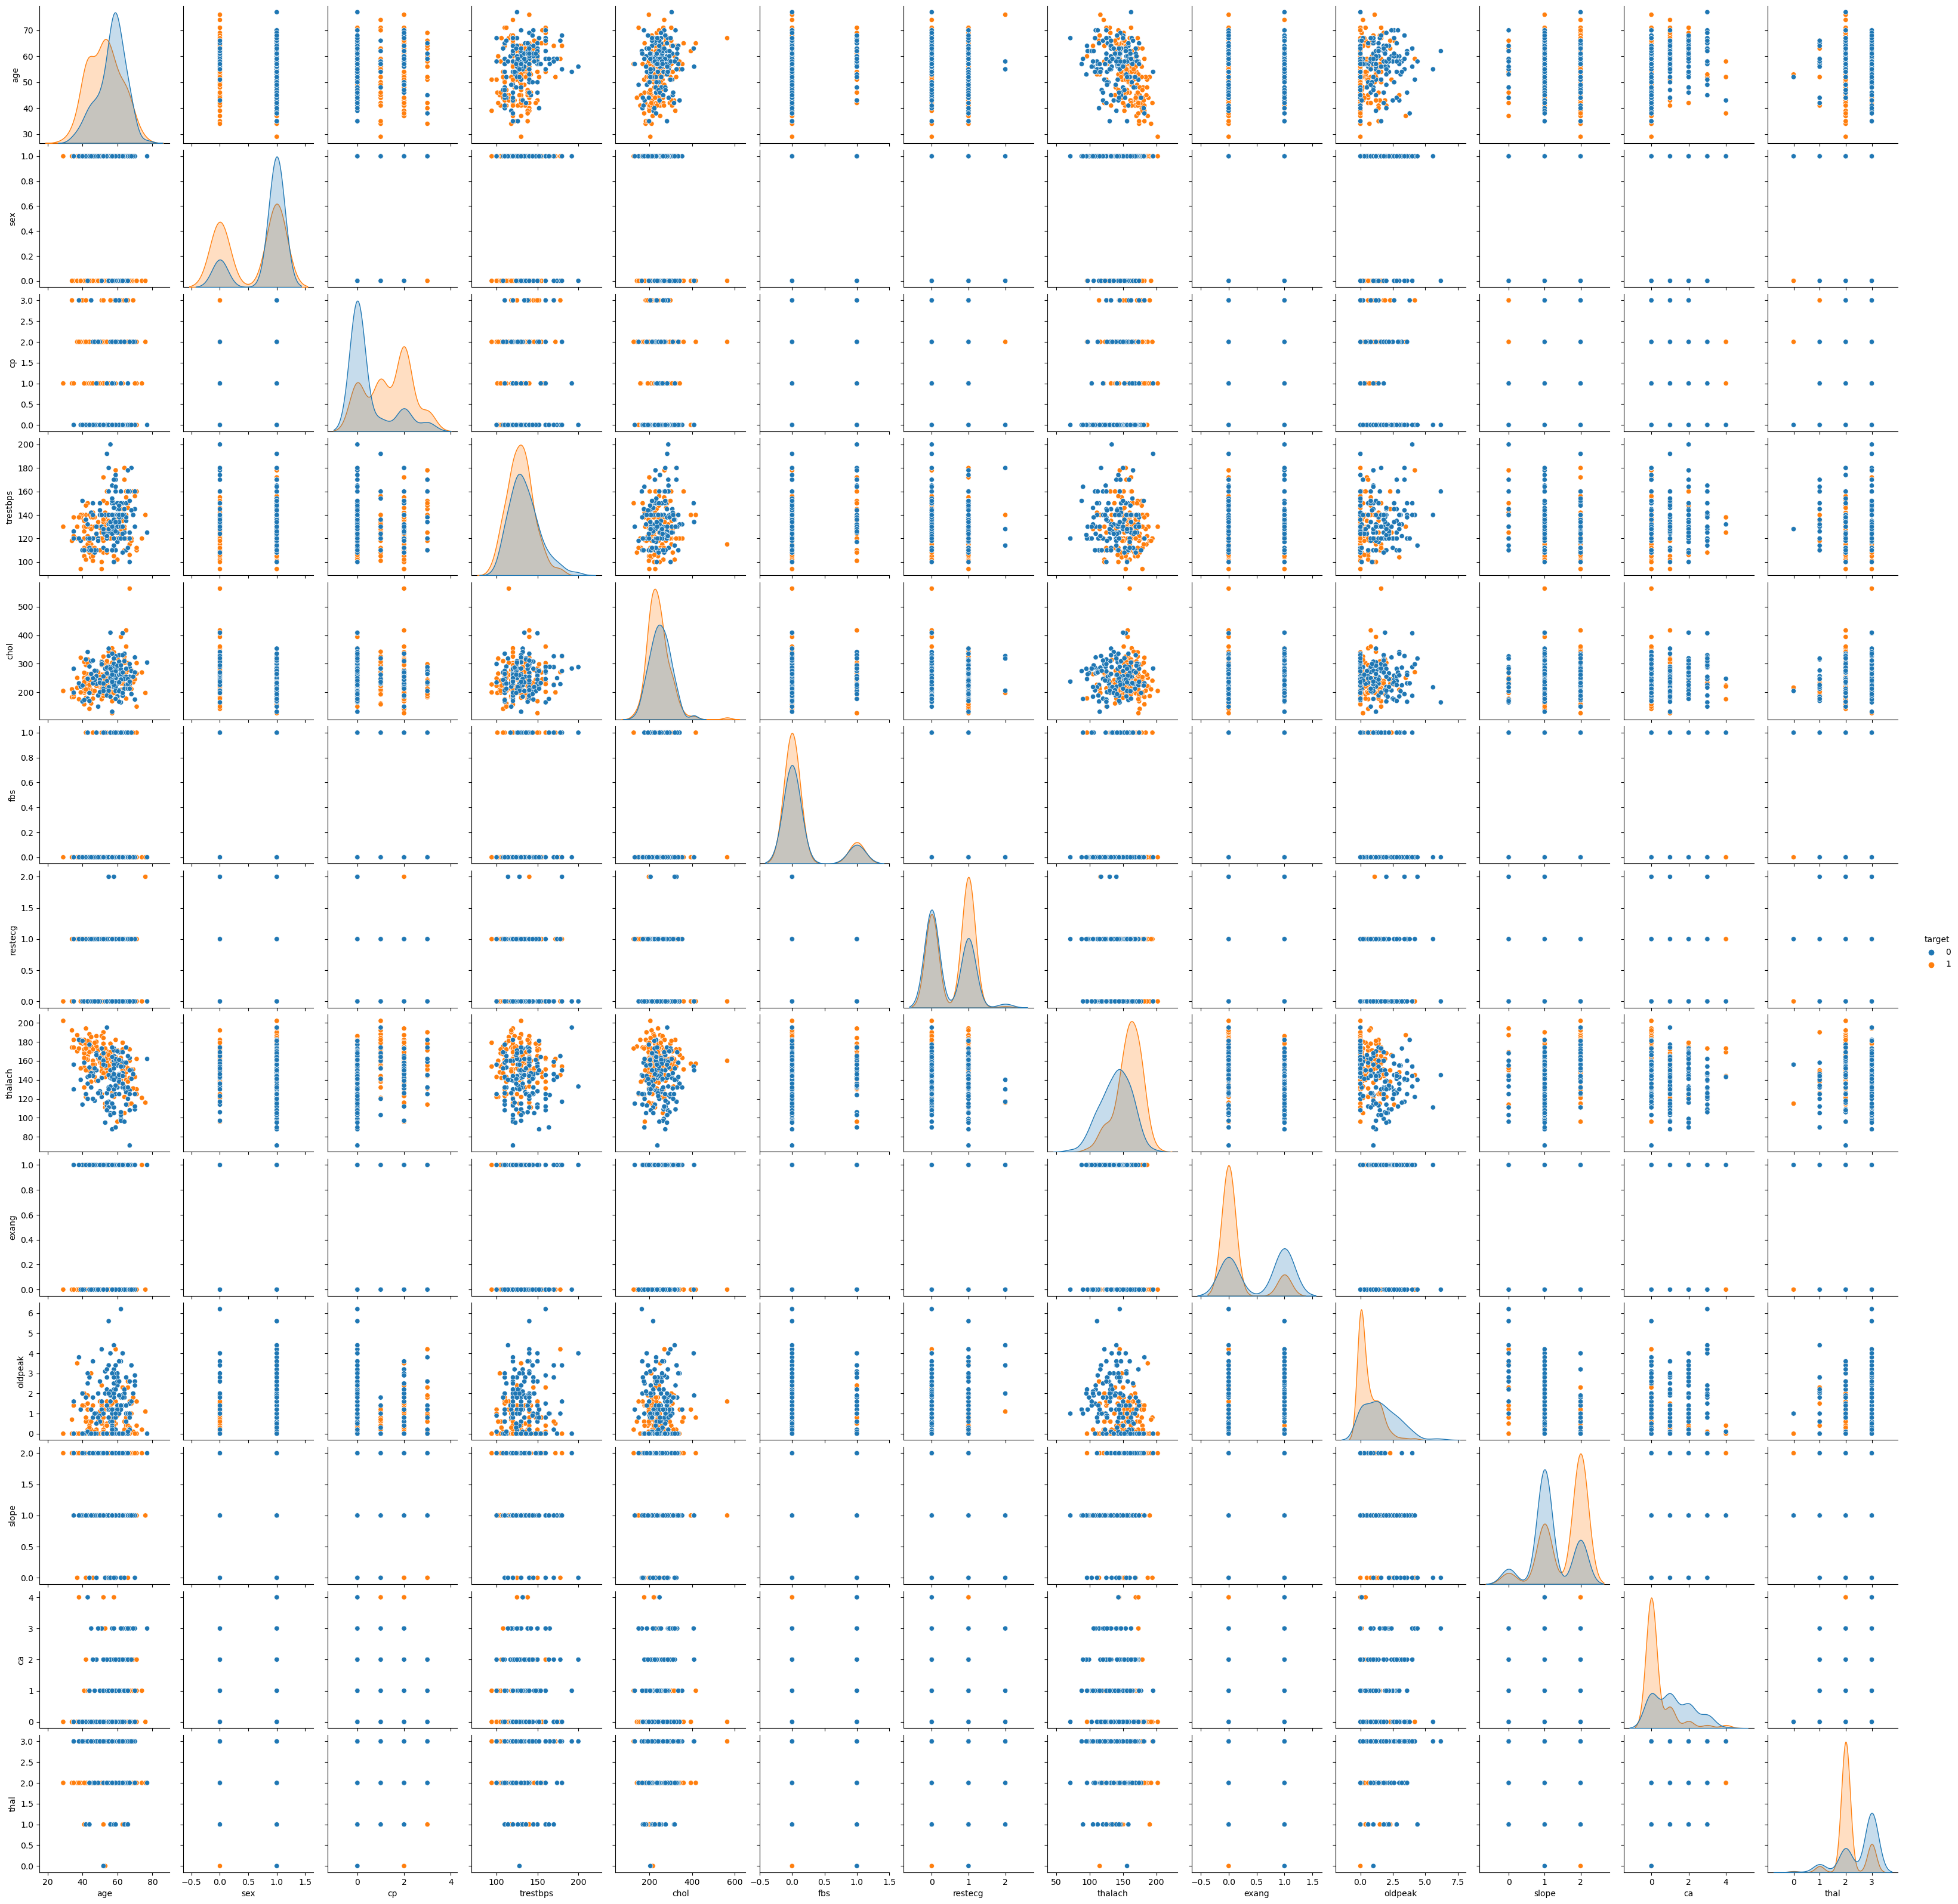

In [43]:
sns.pairplot(df, hue="target")

### Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X=df.drop(['target'],axis=1)
y=df['target']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=101)

### Importing Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [47]:
lr= LogisticRegression()

In [48]:
lr.fit(X_train, y_train).score(X_train, y_train)

0.8530805687203792

In [49]:
prediction= lr.predict(X_test)

In [50]:
print(X_test.head(1))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
162   41    1   1       120   157    0        1      182      0      0.0   

     slope  ca  thal  
162      2   0     2  


### Importing Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [52]:
#Random Forest Classifier with n_estimator as 150
rfc_model = RandomForestClassifier(n_estimators=150)

In [53]:
#Fitting the model
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [54]:
#Predicting the y_pred_test
y_pred_test = rfc_model.predict(X_test)

In [55]:
#Checking accuracy score, confusion matrix and classification report on test data
print("Accuracy score of RFC model on test dataset is : ")
print(accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy score of RFC model on test dataset is : 
0.8241758241758241
[[31 12]
 [ 4 44]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.79        43
           1       0.79      0.92      0.85        48

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



### Check the accuracy using random forest with cross validation

In [56]:
from sklearn.model_selection import KFold,cross_val_score

In [57]:
#Defining cross validation generator and calculating cross_val_score
seed=7
kfold = KFold(n_splits=4,random_state=seed,shuffle=True)
print(cross_val_score(rfc_model, X, y, cv=kfold, scoring='accuracy'))

[0.84210526 0.77631579 0.84       0.88      ]


In [58]:
#Mean of cross_val_score
print(cross_val_score(rfc_model, X, y, cv=kfold, scoring='accuracy').mean())

0.8213157894736841


Looking at the accuracy score, RandomForestClassifier with cross validation has the highest accuracy score of 82.79%

### Checking for Impactful features

In [59]:
feature_labels = list(X)
feature_importance = pd.DataFrame({'Feature' : feature_labels, 'Importance' : rfc_model.feature_importances_})

In [60]:
feature_importance[feature_importance['Importance']>0.025]

,Feature,Importance
0,age,0.086227
1,sex,0.032993
2,cp,0.152201
3,trestbps,0.076086
4,chol,0.073578
7,thalach,0.105138
8,exang,0.045271
9,oldpeak,0.143928
10,slope,0.051091
11,ca,0.102829


As we can see above, all the variables in the dataset play a important role in detecting CVD